<a href="https://colab.research.google.com/github/jiyeonjin/0624_new/blob/main/0804_%EC%B9%BC%EB%A7%8C%ED%95%84%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

칼만필터 코드 예제

In [10]:
import random

# 측정 오차 (센서 노이즈 등)
measurement_error = 4.0  # 분산 2.0^2 = 4.0

# 실제 위치는 0, 노이즈가 섞인 측정값 10개 생성
measurements = [0 + random.gauss(0, 2.0) for _ in range(10)]

estimate = 0.0  # 초기 추정값
error_in_estimate = 1.0  # 초기 추정 오차

# 칼만 필터 적용
for z in measurements:
    # 칼만 이득 계산
    K = error_in_estimate / (error_in_estimate + measurement_error)
    # 추정값 갱신
    estimate = estimate + K * (z - estimate)
    # 추정 오차 갱신
    error_in_estimate = (1 - K) * error_in_estimate

print(f"최종 수정값: {estimate:.2f}")

최종 수정값: 0.16


# 1️⃣ 칼만 필터 실습 개요

In [11]:
# 📌 칼만 필터란?
# 센서 측정값이 노이즈로 인해 부정확할 때,
# 이전 추정값 + 새 측정값을 가중 평균하여 더 나은 추정값을 만들어내는 알고리즘입니다.
#
# 실습 목표:
# 실제 위치가 0인 상황에서, 노이즈가 섞인 측정값들을 기반으로
# 칼만 필터를 통해 더 정확한 추정값을 계산해봅니다.

# 2️⃣ 실습용 라이브러리 및 데이터 생성

In [12]:
import random
import matplotlib.pyplot as plt

# 측정값에 포함될 노이즈 표준편차
measurement_noise_std = 2.0
measurement_error = measurement_noise_std ** 2  # 분산 = 표준편차^2

# 실제 위치는 0, 여기에 노이즈를 섞은 측정값 10개 생성
measurements = [0 + random.gauss(0, measurement_noise_std) for _ in range(10)]

# 결과 확인
print("노이즈 섞인 측정값:", [round(m, 2) for m in measurements])

노이즈 섞인 측정값: [0.89, 1.13, 0.21, -2.16, 0.56, 2.21, 5.65, -0.59, 3.04, 1.57]


# 3️⃣ 칼만 필터 알고리즘 적용

In [13]:
# 초기 추정값과 추정 오차 설정
estimate = 0.0  # 시작 추정값
error_in_estimate = 1.0  # 추정 오차 (불확실성)

# 추정값 저장용 리스트
estimates = []

# 칼만 필터 반복 적용
for z in measurements:
    # 칼만 이득 계산
    K = error_in_estimate / (error_in_estimate + measurement_error)

    # 추정값 갱신
    estimate = estimate + K * (z - estimate)

    # 추정 오차 갱신
    error_in_estimate = (1 - K) * error_in_estimate

    # 저장
    estimates.append(estimate)

# 최종 추정 결과 출력
print(f"\n📌 최종 추정값: {estimate:.2f}")


📌 최종 추정값: 0.89


# 4️⃣ 추정값 시각화

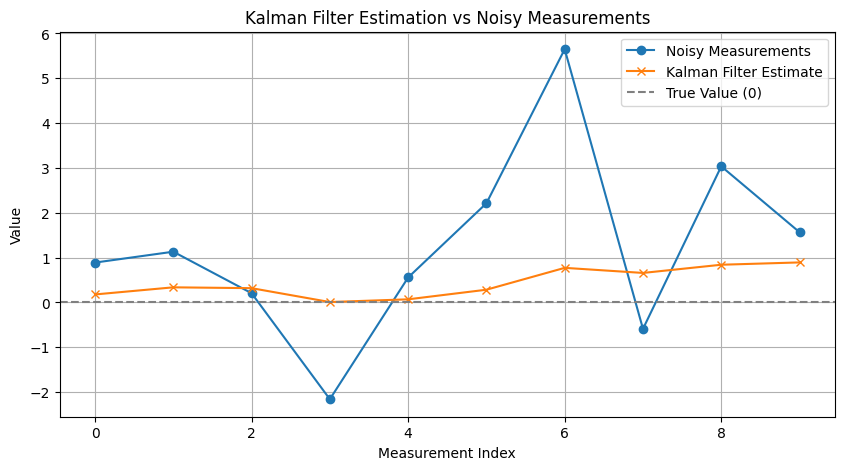

In [14]:
# 시각화: 측정값 vs 칼만 필터 추정값
plt.figure(figsize=(10, 5))
plt.plot(measurements, label='Noisy Measurements', marker='o')
plt.plot(estimates, label='Kalman Filter Estimate', marker='x')
plt.axhline(0, color='gray', linestyle='--', label='True Value (0)')
plt.title("Kalman Filter Estimation vs Noisy Measurements")
plt.xlabel("Measurement Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()